<div style="text-align: center;">
  <h1><b>Exploratory Study on Filipino Household Income and Expenditure</b></h1>
  <h4>Prepared by: Khristian F. Rodas & James Patrick De Mesa | BSIT 3B</h4>
  <h4>Submitted for the subject: ITD – Data Mining</h4>
  <hr>
</div>


<div style="text-align: justify">
  The data in this project comes from the Family Income and Expenditure Survey (FIES), which is run every three years by the Philippine Statistics Authority (PSA). The survey collects detailed information about how Filipino families earn and spend their money, including different types of expenses, where their income comes from (both in cash and other forms), and other factors that affect how households manage their finances.
  <br><br>
  This dataset has over 40,000 entries and about 60 columns, mostly related to household income and spending. For this analysis, we’ll be using Python libraries like <b>pandas</b>, <b>seaborn</b>, <b>matplotlib</b>, and <b>numpy</b> to explore the data.
</div>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
income = pd.read_csv("datasets/Family Income and Expenditure.csv")
income

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


# Understanding Regional Income Sources
We begin by identifying the most common sources of income for Filipino households in each region. This helps us understand how people make a living and the dominant economic activities in different parts of the country.

### Q1. What are the primary sources of income in all regions in the Philippines?

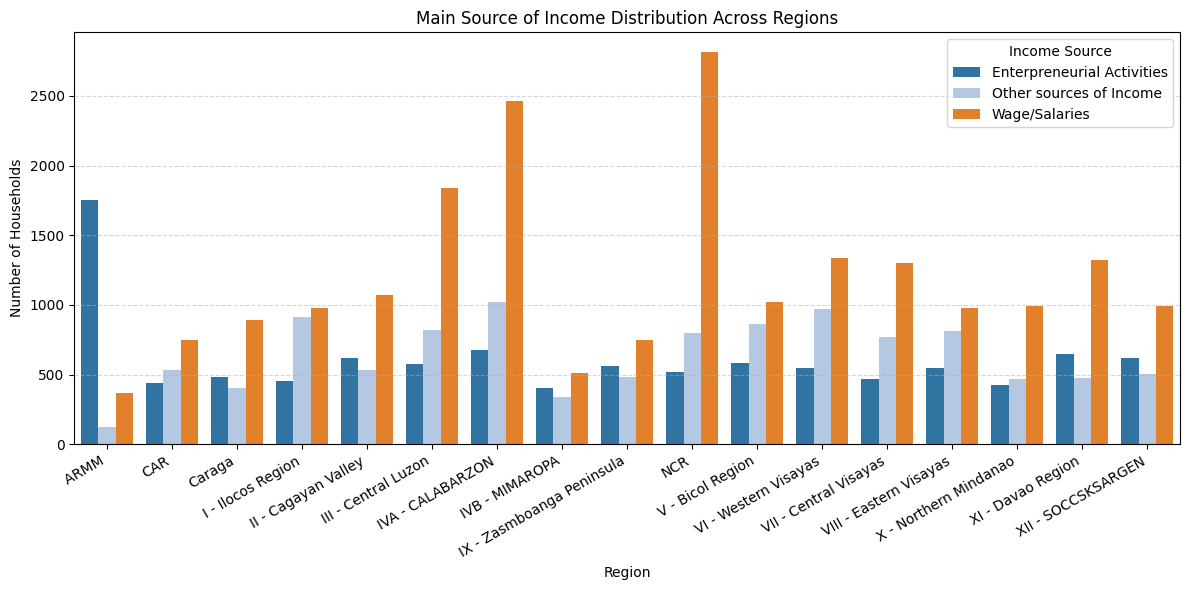

In [3]:
region_income_counts = income.groupby(['Region', 'Main Source of Income']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region", 
    y="Count", 
    hue="Main Source of Income", 
    data=region_income_counts, 
    palette="tab20"
)
plt.title("Main Source of Income Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Households")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.legend(title="Income Source")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Insight 1:
Most Filipino households earn primarily through <b>wages and salaries</b>, especially in more urbanized regions like <b>National Capital Region (NCR)</b>, <b>CALABARZON</b>, and <b>Central Luzon</b>. On the other hand, regions such as <b>ARMM</b> (now known as BARMM) show a notable presence of households relying on <b>entrepreneurial activities</b>, suggesting a lack of formal employment opportunities and a higher reliance on small-scale businesses or farming.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Mapping Regional Income Differences
Next, we explore how household income varies across regions. This allows us to see where people earn more or less and may reflect the availability of jobs, cost of living, or economic development in each region.

### Q2. What is the average total household income per region?

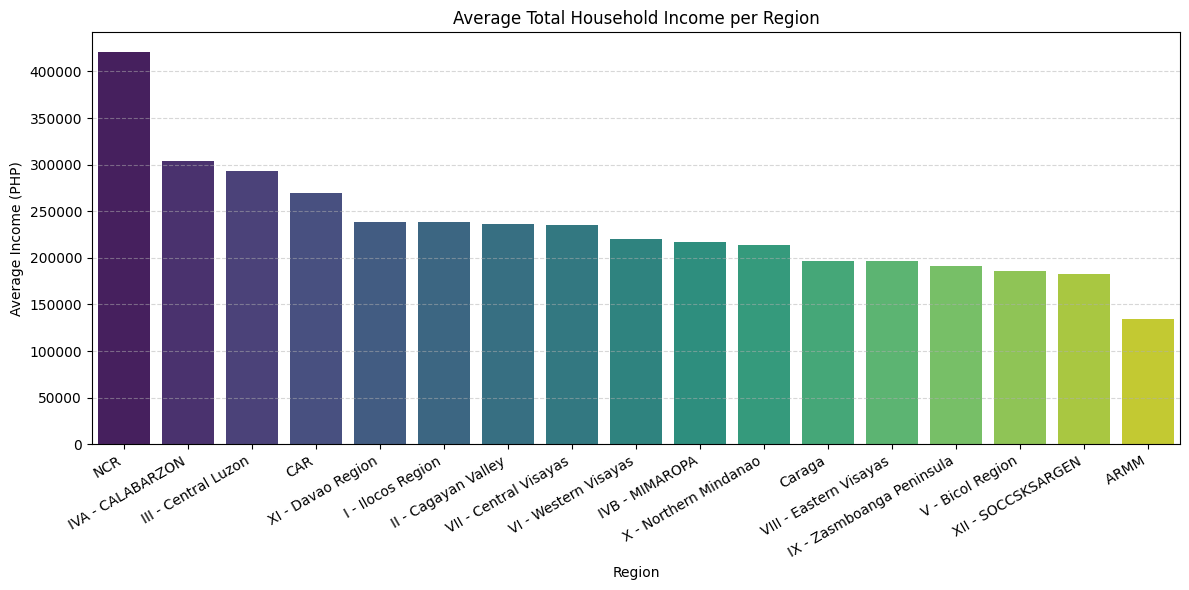

In [4]:
avg_income_per_region = income.groupby("Region")["Total Household Income"].mean().reset_index()
avg_income_per_region = avg_income_per_region.sort_values(by="Total Household Income", ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Total Household Income",
    data=avg_income_per_region,
    palette="viridis"
)
plt.title("Average Total Household Income per Region")
plt.xlabel("Region")
plt.ylabel("Average Income (PHP)")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 2:
Regions such as the <b>National Capital Region (NCR)</b> and <b>CALABARZON</b> report the highest average household income, which aligns with their status as major economic hubs. Meanwhile, regions like <b>ARMM/BARMM</b> and <b>Region IX</b> tend to have lower averages, highlighting ongoing regional income disparities across the country.


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# How Much Is Spent on Food?
Food is a basic necessity and a major household expense. By looking at average food spending in each region, we get a clearer picture of household priorities and local food costs.

### Q3. What is the average total food expenditure per region?

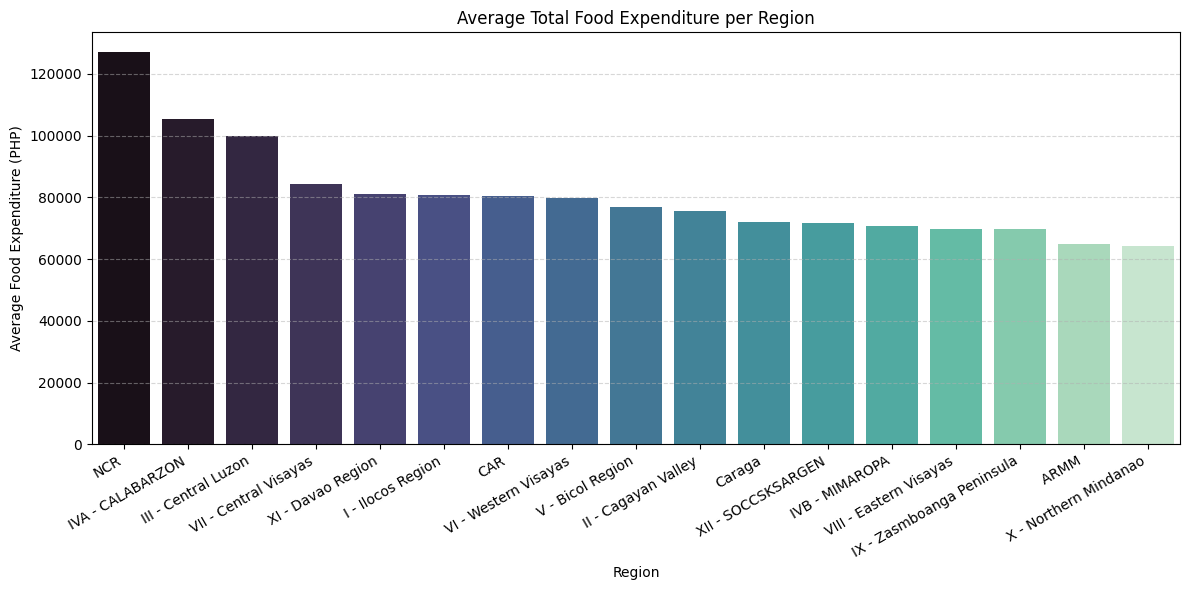

In [5]:
avg_food_exp = income.groupby("Region")["Total Food Expenditure"].mean().reset_index()
avg_food_exp = avg_food_exp.sort_values(by="Total Food Expenditure", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Total Food Expenditure",
    data=avg_food_exp,
    palette="mako"
)
plt.title("Average Total Food Expenditure per Region")
plt.xlabel("Region")
plt.ylabel("Average Food Expenditure (PHP)")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 3:
Households in wealthier and more urbanized regions like <b>NCR</b> and <b>CALABARZON</b> tend to spend more on food, which is expected given their higher incomes and higher cost of living. Regions with lower income levels, such as <b>BARMM</b> and <b>Region VIII</b>, spend less on food on average, potentially due to both affordability constraints and different dietary patterns.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# The Cost of a Staple: Rice
Rice is a daily essential for most Filipino households. Analyzing rice expenditure helps us understand both affordability and regional price differences for this staple food.

### Q4. What is the average household expenditure on rice across different regions?

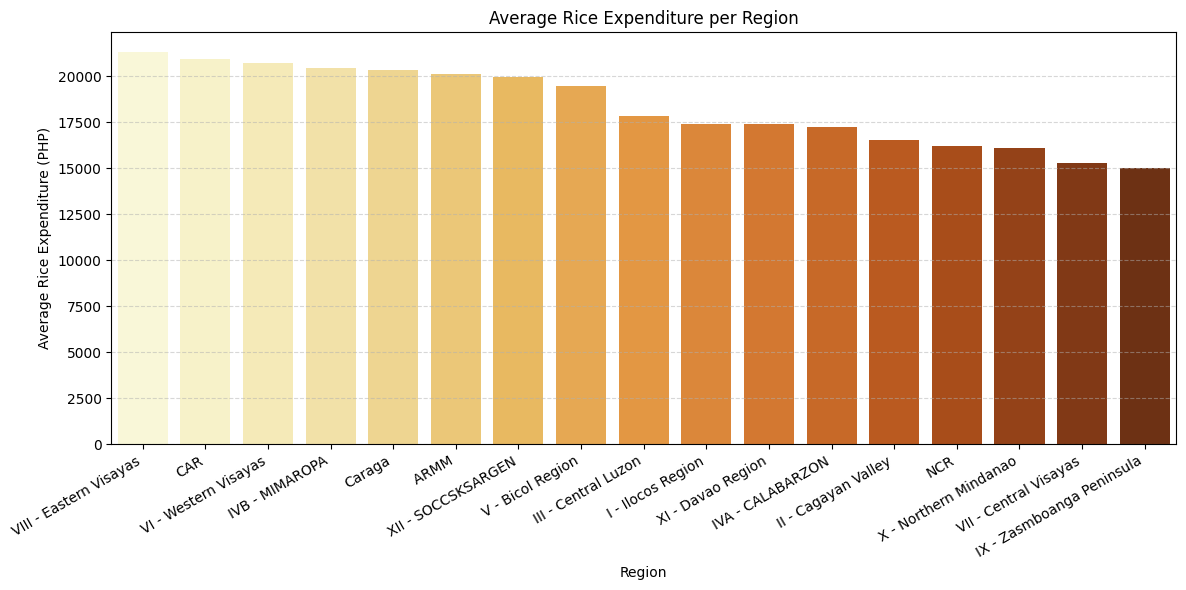

In [6]:
# Calculate average rice expenditure per region
avg_rice_exp = income.groupby("Region")["Total Rice Expenditure"].mean().reset_index()
avg_rice_exp = avg_rice_exp.sort_values(by="Total Rice Expenditure", ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Region",
    y="Total Rice Expenditure",
    data=avg_rice_exp,
    palette="YlOrBr"
)
plt.title("Average Rice Expenditure per Region")
plt.xlabel("Region")
plt.ylabel("Average Rice Expenditure (PHP)")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 4:
Regions such as <b>CAR</b> and <b>Region XII</b> show higher rice expenditure, possibly due to larger household sizes or limited access to affordable rice. Surprisingly, <b>NCR</b> has moderate rice expenses despite high income—suggesting either smaller household sizes or more diverse food consumption. Rice remains a major part of the Filipino diet nationwide.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Family Size and Income
We investigate whether the number of family members affects total household income. Larger families may have more income earners—or more dependents—so this relationship is worth exploring.

### Q5. What is the relationship between household income and the number of family members?

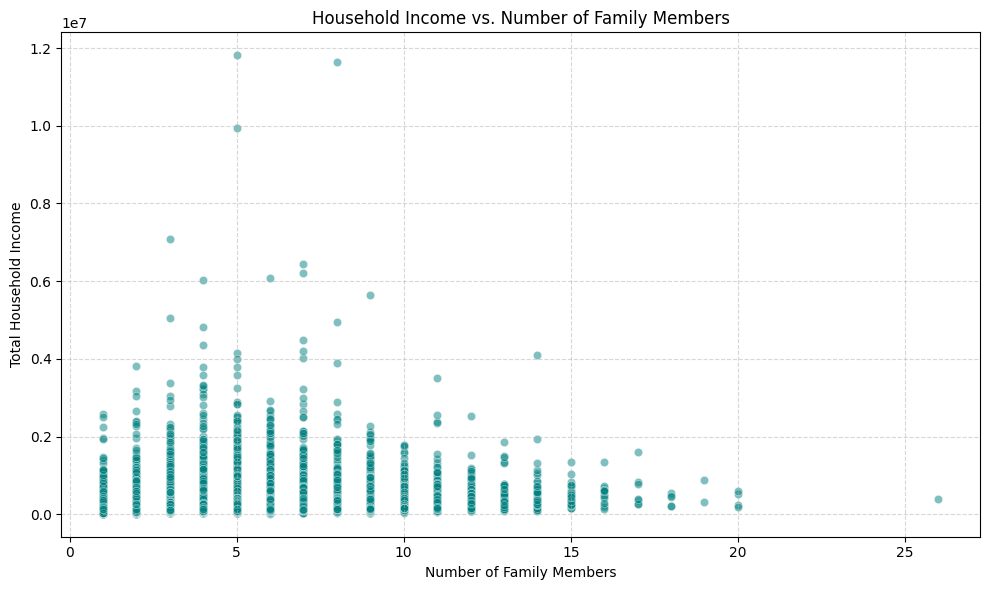

In [7]:
income_vs_family_size = income[["Total Household Income", "Total Number of Family members"]]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Number of Family members", 
    y="Total Household Income", 
    data=income_vs_family_size, 
    alpha=0.5, 
    color="teal"
)
plt.title("Household Income vs. Number of Family Members")
plt.xlabel("Number of Family Members")
plt.ylabel("Total Household Income")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 5:
Most households have between <b>3 to 6</b> members. While income varies greatly, there's no strong direct correlation, some large families earn less while others earn more. However, households with fewer members are often observed across all income levels, showing that family size alone doesn’t determine income level.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Income by Age of the Household Head
Does age bring financial stability? We explore how the age of the household head affects income, which may reflect job experience, retirement, or access to employment.

### Q6. How does the household head's age affect the total household income?

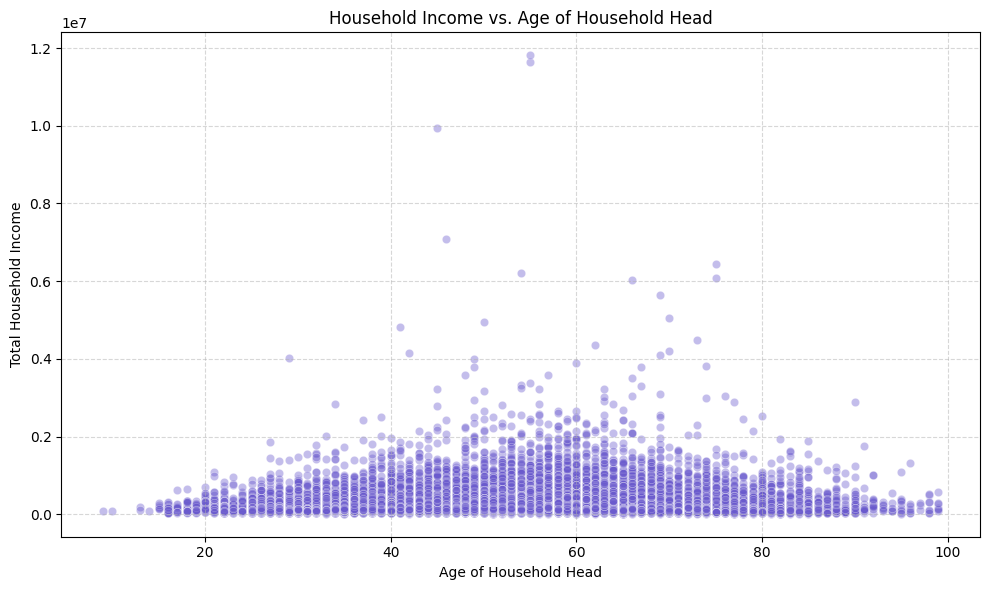

In [8]:
income_vs_age = income[["Household Head Age", "Total Household Income"]]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Household Head Age",
    y="Total Household Income",
    data=income_vs_age,
    alpha=0.4,
    color="slateblue"
)
plt.title("Household Income vs. Age of Household Head")
plt.xlabel("Age of Household Head")
plt.ylabel("Total Household Income")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 6
Household heads in the <b>30 to 60</b> age range generally earn more, likely because they are in their prime working years. Income tends to be lower for very young and older household heads, which aligns with expected career stages, starting out or nearing retirement.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Where Is Income the Highest?
Some regions offer better job opportunities and higher wages. This question looks at where people earn the most and least across the country.

### Q7. Which regions have the highest and lowest average income?

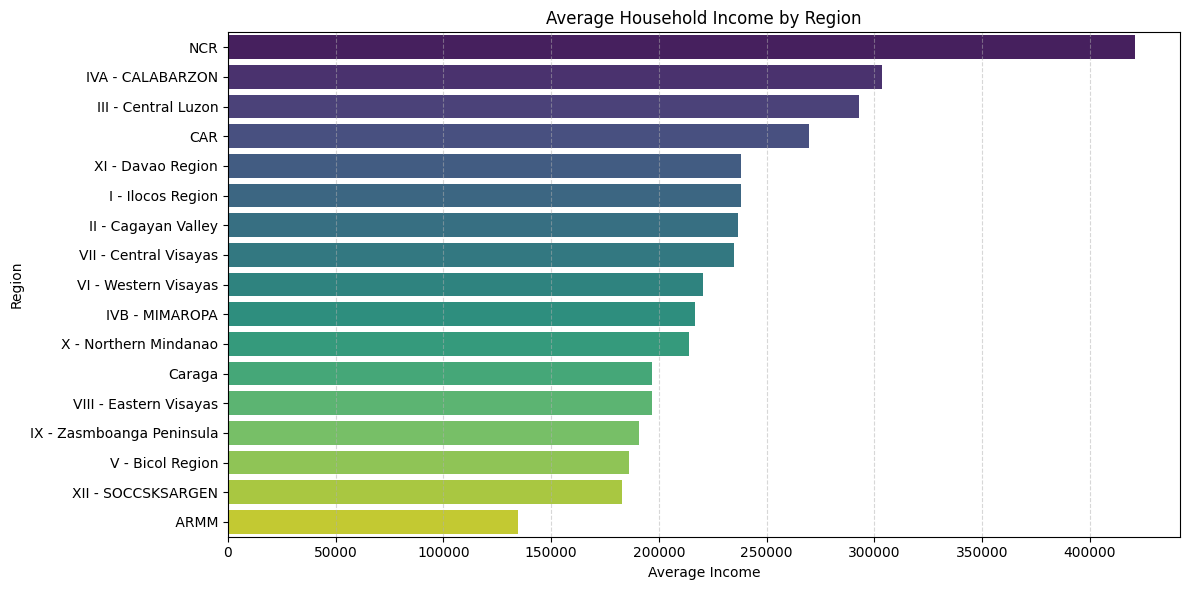

In [9]:
region_income_avg = income.groupby("Region")["Total Household Income"].mean().reset_index()
region_income_avg = region_income_avg.sort_values(by="Total Household Income", ascending=False)
region_income_avg

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Total Household Income", 
    y="Region", 
    data=region_income_avg, 
    palette="viridis"
)
plt.title("Average Household Income by Region")
plt.xlabel("Average Income")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 7
Regions like <b>NCR, CALABARZON, and Central Luzon</b> have the highest average household incomes, likely due to more job opportunities and urbanization. On the other hand, regions such as BARMM and Eastern Visayas show significantly lower average incomes, indicating limited economic activity and employment options in these areas.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Investing in Education
Education is an important long-term investment for families. We examine how much households spend on education across regions to see if income, access, or values influence this priority.

### Q8. How much do households spend on education across different regions?

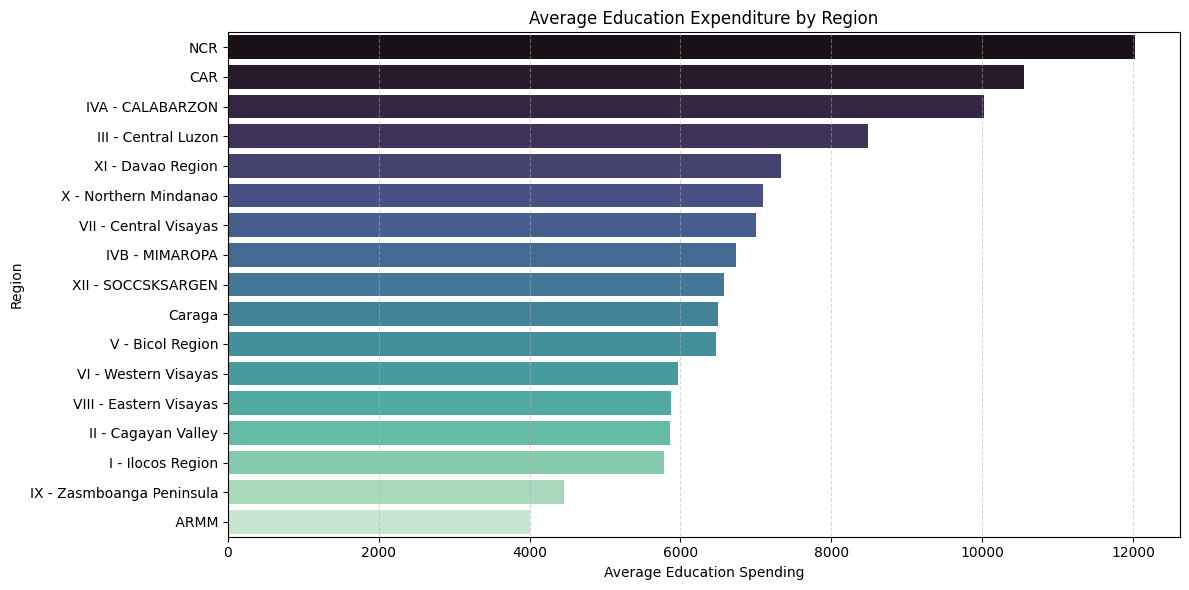

In [10]:
education_expense = income.groupby("Region")["Education Expenditure"].mean().reset_index()
education_expense = education_expense.sort_values(by="Education Expenditure", ascending=False)
education_expense

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Education Expenditure", 
    y="Region", 
    data=education_expense, 
    palette="mako"
)
plt.title("Average Education Expenditure by Region")
plt.xlabel("Average Education Spending")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 8:
Regions such as <b>NCR</b> and <b>Region IV-A</b> tend to spend more on education, possibly due to the availability of more private schools and higher educational standards. In contrast, regions like <b>BARMM and MIMAROPA</b> have lower education expenditures, which may reflect accessibility or prioritization issues in schooling.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Does Income Affect What You Eat?
We continue analyzing whether higher income levels lead to greater food spending. This helps us understand priorities and budget allocations among Filipino households across different income brackets.

### Q9. Is there a relationship between household income and food expenditure?

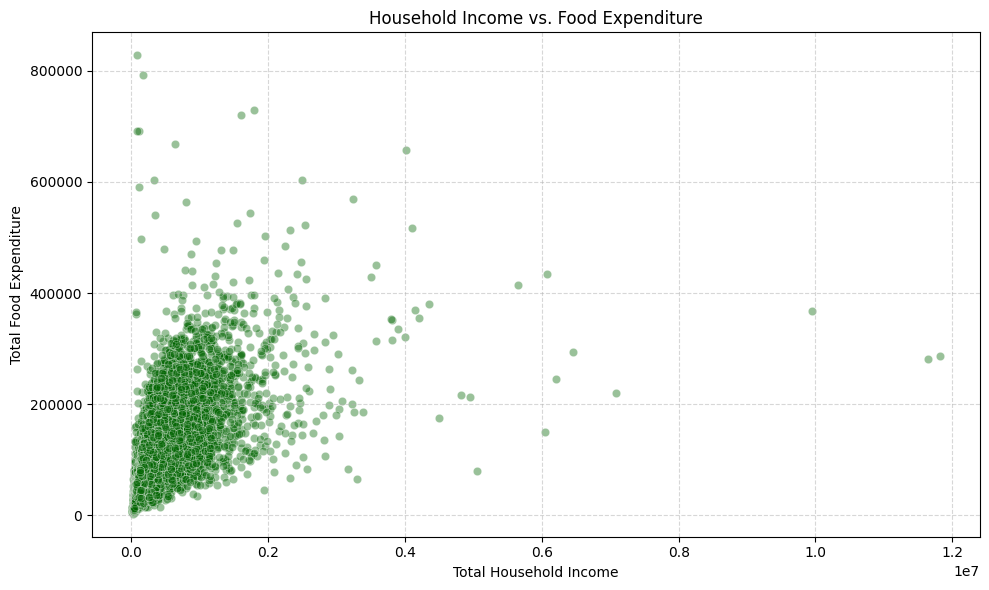

In [11]:

income_food = income[["Total Household Income", "Total Food Expenditure"]]
income_food

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Total Household Income",
    y="Total Food Expenditure",
    data=income_food,
    alpha=0.4,
    color="darkgreen"
)
plt.title("Household Income vs. Food Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Total Food Expenditure")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 9:
There is a noticeable trend where households with higher income also spend more on food. However,<b> there are outliers, some low-income households spend significantly on food,</b> which may reflect larger household sizes or regional food pricing differences. This suggests that while income affects food expenditure, other factors play a role too.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# What Else Do Households Spend On?
Food isn't the only priority—households also spend on clothing, housing, medical care, transportation, and other essentials. By calculating the average non-food expenses, we get a more complete view of how Filipino families manage their money.

### Q10. What is the average non-food expenditure per region?

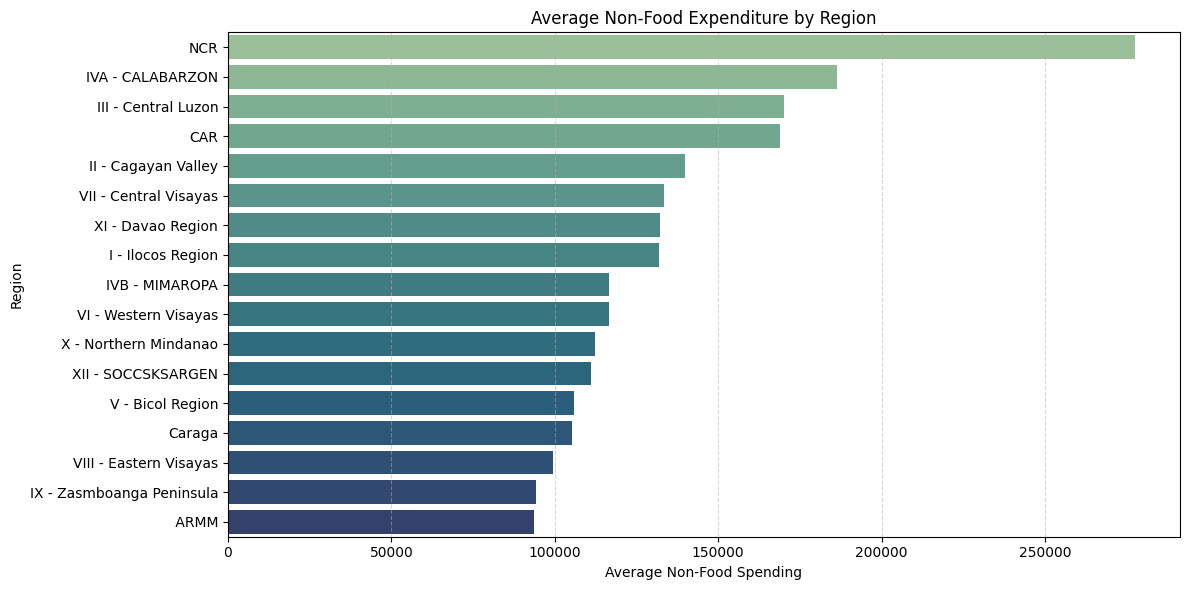

In [12]:
non_food_columns = [
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses'
]


income["Total Non-Food Expenditure"] = income[non_food_columns].sum(axis=1)


non_food_expense = income.groupby("Region")["Total Non-Food Expenditure"].mean().reset_index()
non_food_expense = non_food_expense.sort_values(by="Total Non-Food Expenditure", ascending=False)
non_food_expense

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Total Non-Food Expenditure", 
    y="Region", 
    data=non_food_expense, 
    palette="crest"
)
plt.title("Average Non-Food Expenditure by Region")
plt.xlabel("Average Non-Food Spending")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 10:
Regions like <b>NCR, Region IV-A, and Central Luzon</b> report higher non-food expenditures, likely driven by urban living costs such as rent, transport, and medical needs. Regions with lower values may indicate less access to these services or more frugal lifestyles.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Are Households Spending Enough on Healthcare?
Healthcare spending reveals how much families prioritize health needs or how accessible services are. Higher spending might reflect better access—or higher costs. Let's compare regional healthcare expenditures to understand the situation better.

### Q11. What is the average medical care expenditure per region?

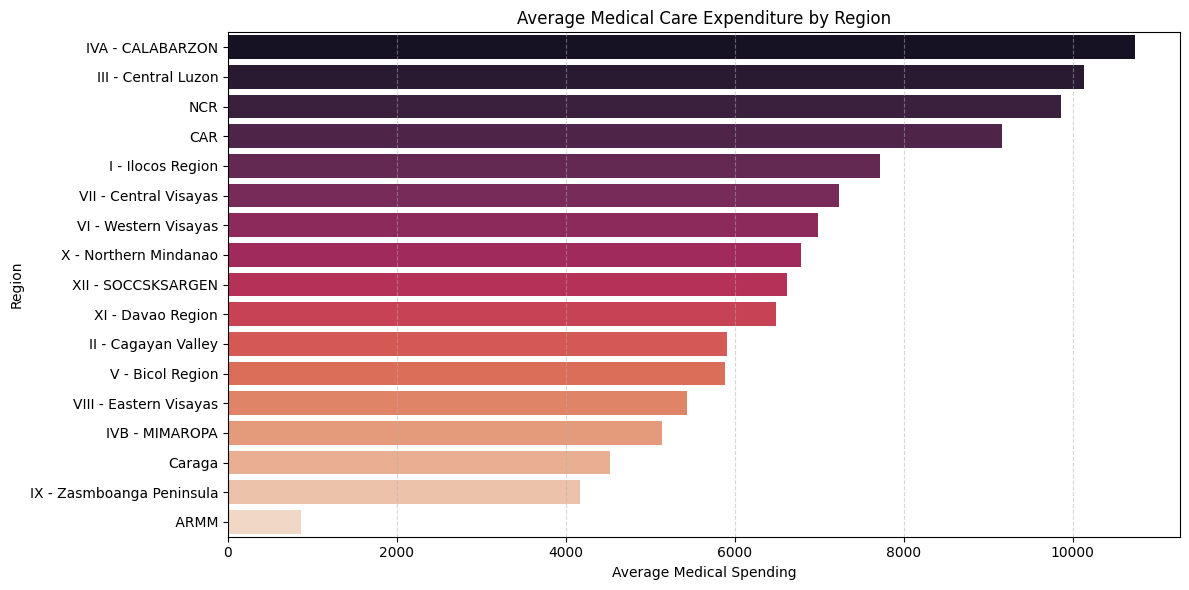

In [13]:
medical_expense = income.groupby("Region")["Medical Care Expenditure"].mean().reset_index()
medical_expense = medical_expense.sort_values(by="Medical Care Expenditure", ascending=False)
medical_expense


plt.figure(figsize=(12, 6))
sns.barplot(
    x="Medical Care Expenditure", 
    y="Region", 
    data=medical_expense, 
    palette="rocket"
)
plt.title("Average Medical Care Expenditure by Region")
plt.xlabel("Average Medical Spending")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 11:
Regions such as <b>NCR and Region III</b> have the highest average medical care expenses, which may be due to higher costs of services in urban areas. Meanwhile, remote or less developed regions tend to spend less, possibly due to fewer medical facilities or reliance on alternative medicine.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Do Households Invest in Education?
Education is often seen as a long-term investment. Looking at regional education spending tells us where families are prioritizing learning and development, especially important in shaping future economic opportunities.

### Q12. What is the average household expenditure on education per region?

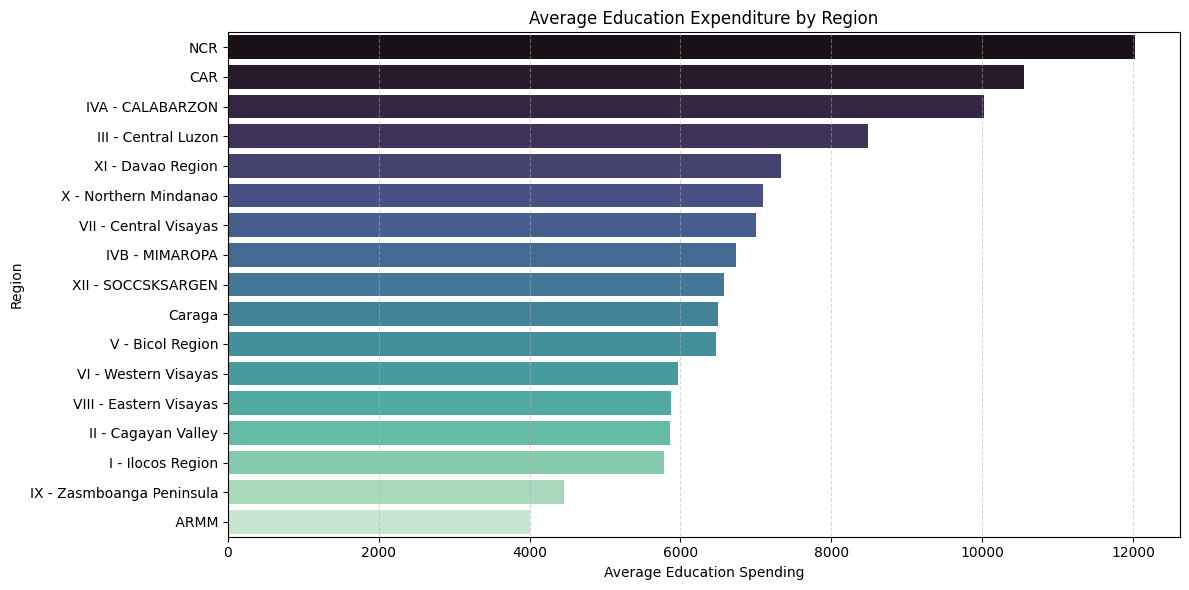

In [14]:
education_expense = income.groupby("Region")["Education Expenditure"].mean().reset_index()
education_expense = education_expense.sort_values(by="Education Expenditure", ascending=False)
education_expense

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Education Expenditure", 
    y="Region", 
    data=education_expense, 
    palette="mako"
)
plt.title("Average Education Expenditure by Region")
plt.xlabel("Average Education Spending")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 11:
Urbanized regions like <b>NCR and Region IV-A</b> show higher spending on education, possibly due to the availability of more private schools and higher tuition fees. In contrast, lower spending in some regions may point to more reliance on public schools or fewer educational opportunities.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# How Much Do Households Spend on Transportation?
Transportation expenses reflect accessibility, infrastructure, and lifestyle. Areas with well-developed transport systems or urban centers may show higher transport spending due to daily commutes, fuel costs, and vehicle ownership.

### Q13. What is the average transportation expenditure per region?

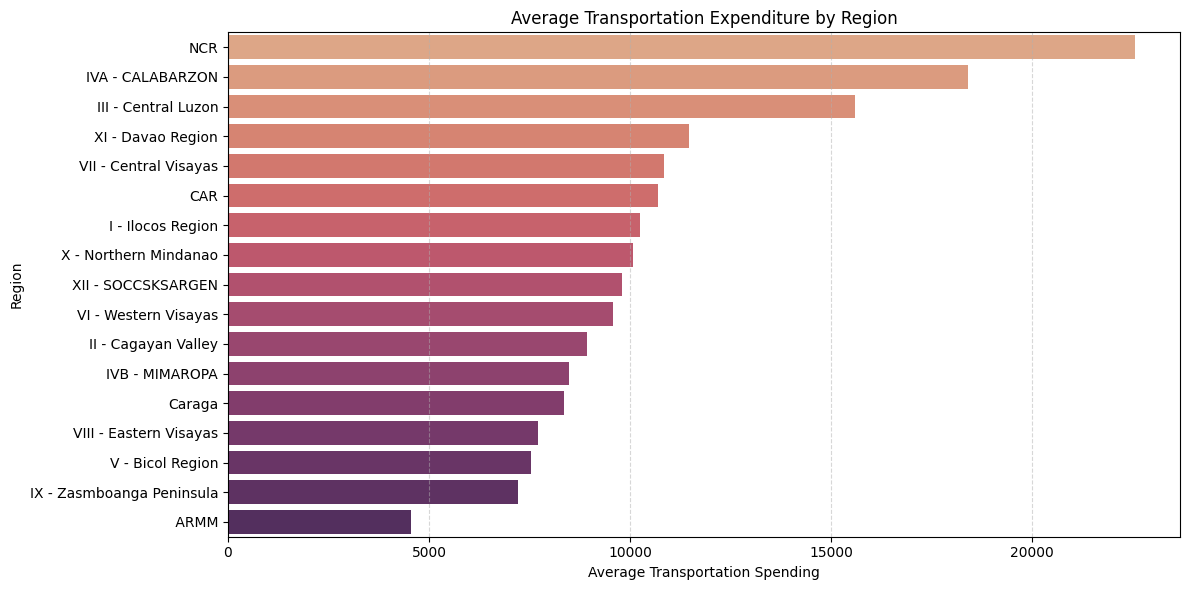

In [15]:
transport_expense = income.groupby("Region")["Transportation Expenditure"].mean().reset_index()
transport_expense = transport_expense.sort_values(by="Transportation Expenditure", ascending=False)
transport_expense

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Transportation Expenditure", 
    y="Region", 
    data=transport_expense, 
    palette="flare"
)
plt.title("Average Transportation Expenditure by Region")
plt.xlabel("Average Transportation Spending")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Insight 13:
Regions such as <b>NCR</b> and <b>Region IV-A</b> have the highest transportation expenses, likely because of daily commuting, vehicle ownership, and higher fuel costs in urban areas. Regions with lower costs may have limited transport access or shorter travel distances.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Do Food Priorities Vary by Region?
Different regions may have distinct food preferences or access to certain food groups. By comparing key food categories, we can understand dietary habits and regional food security.

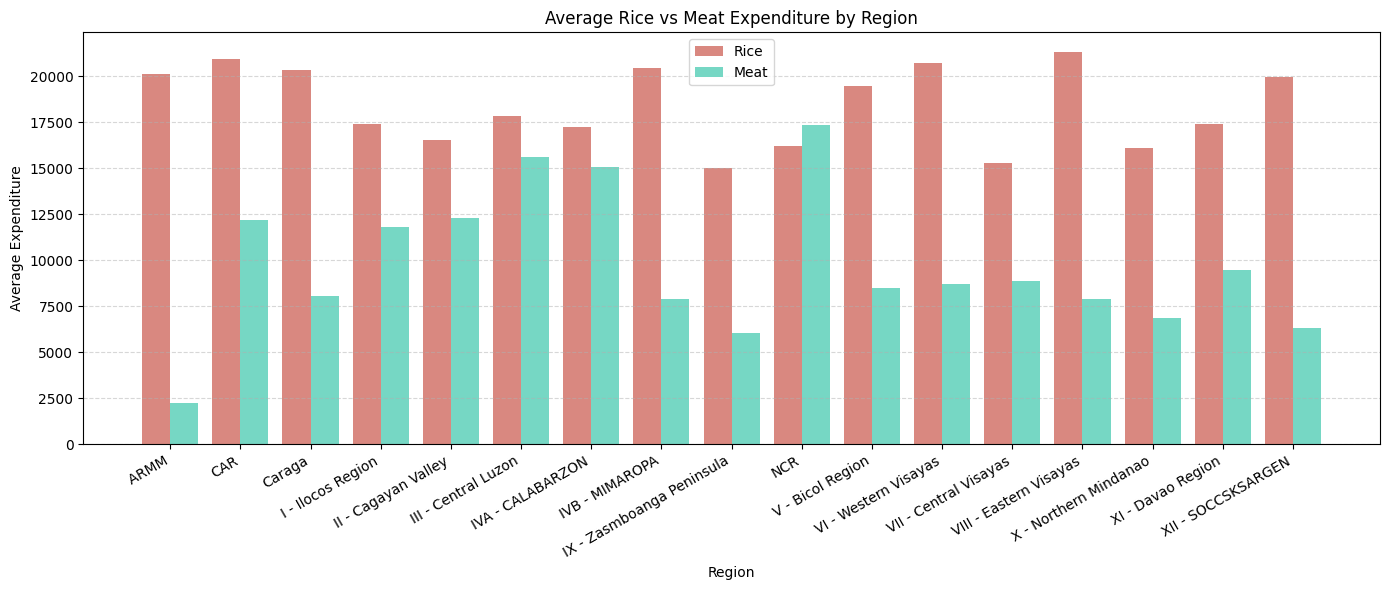

In [16]:
food_focus = income.groupby("Region")[["Total Rice Expenditure", "Meat Expenditure"]].mean().reset_index()
food_focus["Rice > Meat"] = food_focus["Total Rice Expenditure"] > food_focus["Meat Expenditure"]
food_focus

plt.figure(figsize=(14, 6))
bar_width = 0.4
index = np.arange(len(food_focus))

plt.bar(index, food_focus["Total Rice Expenditure"], bar_width, label="Rice", color="#D98880")
plt.bar(index + bar_width, food_focus["Meat Expenditure"], bar_width, label="Meat", color="#76D7C4")

plt.xlabel("Region")
plt.ylabel("Average Expenditure")
plt.title("Average Rice vs Meat Expenditure by Region")
plt.xticks(index + bar_width / 2, food_focus["Region"], rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Insight 14:
Regions such as <b>ARMM</b> and <b>Region XII</b> spend more on <b>rice</b> than on <b>meat</b>, possibly due to affordability or local preferences. In contrast, more urbanized regions like <b>NCR</b> and <b>Region IV-A</b> allocate more for <b>meat</b>, suggesting diverse diets or greater purchasing power.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Do Food Spending Habits Differ by Income Level?
While regional comparisons reveal geographical trends, understanding how income levels affect food spending provides a deeper socioeconomic perspective. Households with higher income may afford a more diverse or higher-quality diet, while lower-income families might prioritize staple goods. This comparison helps us grasp how wealth influences daily consumption choices in the Philippines.

### Q15. How does food expenditure compare between low-income and high-income households?

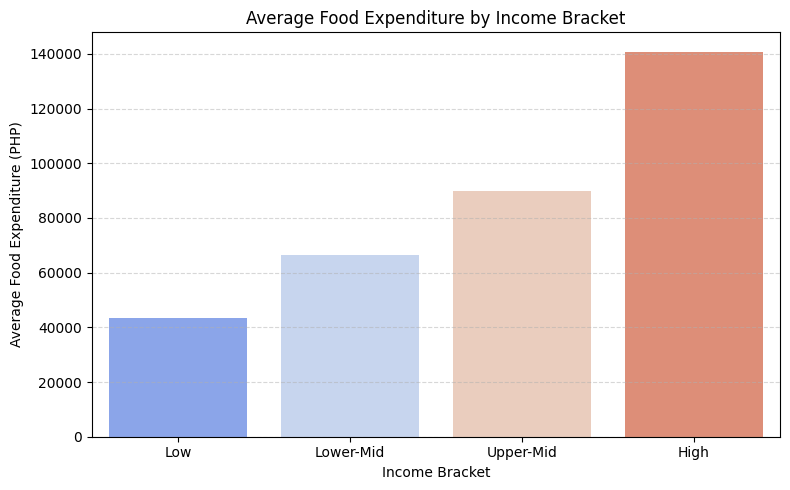

In [17]:
income['Income Bracket'] = pd.qcut(income['Total Household Income'], q=4, labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High'])

food_by_income = income.groupby('Income Bracket')['Total Food Expenditure'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Income Bracket',
    y='Total Food Expenditure',
    data=food_by_income,
    palette='coolwarm'
)
plt.title("Average Food Expenditure by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Food Expenditure (PHP)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Insight 15:
Households with a <b>higher income</b> tend to spend <b>more money on food</b> compared to those with a <b>lower income</b>. However, the increase in food spending is <b>not exactly equal</b> to the increase in income. This means that while richer families buy <b>more or better food</b>, they don’t spend all of their extra money just on food.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# What Do Households Spend More on: Food or Non-Food Items?
Understanding whether households prioritize food or non-food items like utilities, education, or transport helps paint a clearer picture of basic needs and living conditions. This also shows how spending behavior changes across different regions.

### Q16. Do households spend more on food or non-food items?

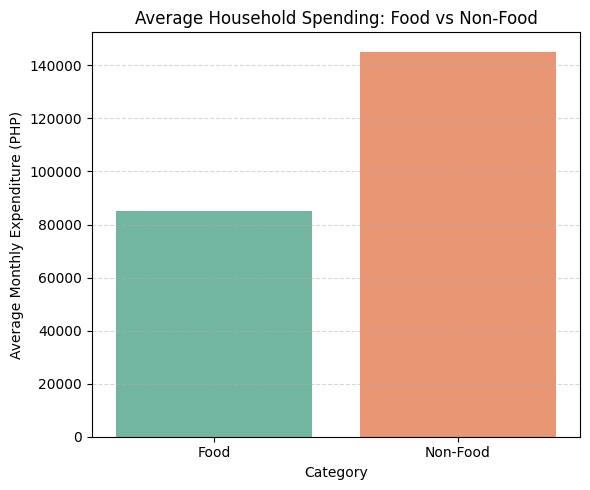

In [18]:
avg_food = income['Total Food Expenditure'].mean()
avg_nonfood = income['Total Non-Food Expenditure'].mean()


spending_type = pd.DataFrame({
    'Category': ['Food', 'Non-Food'],
    'Average Expenditure': [avg_food, avg_nonfood]
})

# Plotting
plt.figure(figsize=(6, 5))
sns.barplot(x='Category', y='Average Expenditure', data=spending_type, palette='Set2')
plt.title("Average Household Spending: Food vs Non-Food")
plt.ylabel("Average Monthly Expenditure (PHP)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 16:
On average, Filipino households spend <b>more on non-food items</b> than on food. This includes things like <b>education, transportation, housing, and medical care</b>. While food is still a major expense, it’s clear that <b>non-food needs take up a bigger share</b> of the budget—showing how diverse and demanding household responsibilities are today.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Do Larger Households Spend More on Food?
Food is a basic necessity, but spending patterns may not increase proportionally with household size. This insight explores the relationship between the number of family members and total food expenditure to better understand how Filipino households manage food budgeting as their size changes.

###  Q17: Is there a relationship between household size and total food expenditure?

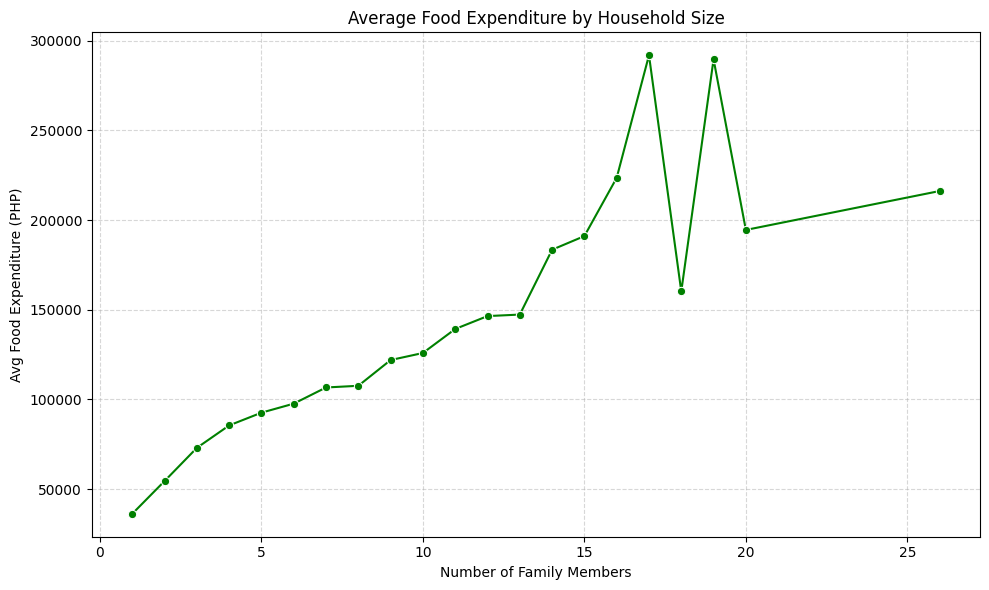

In [19]:
household_food = income.groupby("Total Number of Family members")["Total Food Expenditure"].mean().reset_index()

household_food = household_food.sort_values("Total Number of Family members")
household_food

plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Total Number of Family members", 
    y="Total Food Expenditure", 
    data=household_food, 
    marker="o", 
    color="green"
)
plt.title("Average Food Expenditure by Household Size")
plt.xlabel("Number of Family Members")
plt.ylabel("Avg Food Expenditure (PHP)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### Insight 17:
As household size increases, total food expenditure generally rises, but not proportionally. This suggests that while larger families spend more on food overall, they may economize per person, possibly by buying in bulk, preparing shared meals, or choosing less expensive food items. This reflects practical budgeting strategies in Filipino households with more members.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# How Many Bedrooms Do Filipino Families Typically Have?
Understanding bedroom count helps assess housing quality and living space. Overcrowding or too few bedrooms may reflect poverty or poor infrastructure.

### Q18. How does the number of bedrooms vary across income brackets?

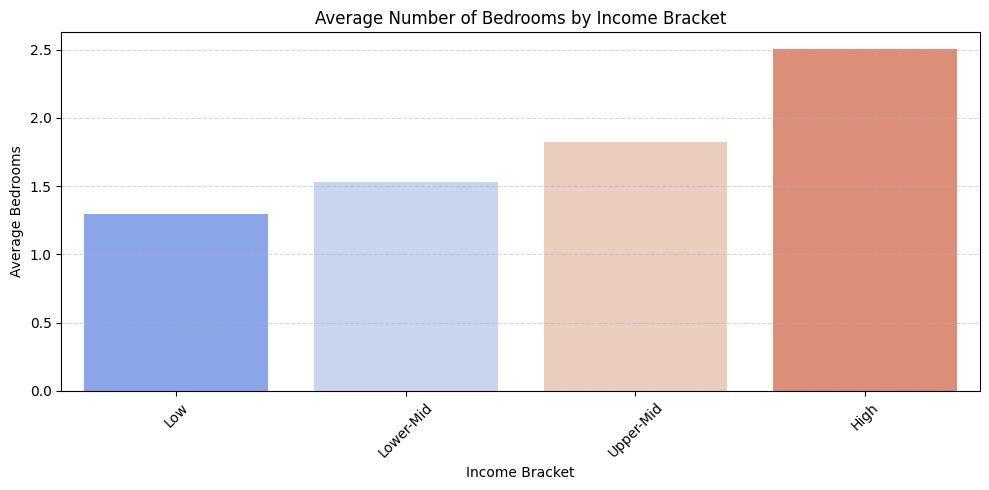

In [20]:
bedrooms_by_income = income.groupby('Income Bracket')['Number of bedrooms'].mean().reset_index()
bedrooms_by_income.columns = ['Income Bracket', 'Average Number of Bedrooms']
bedrooms_by_income

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Income Bracket',
    y='Average Number of Bedrooms',
    data=bedrooms_by_income,
    palette='coolwarm'
)
plt.title("Average Number of Bedrooms by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Bedrooms")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 18:
<b>Higher-income households</b> tend to have <b>more bedrooms</b>, typically between 3 to 4. Meanwhile, <b>low-income households</b> usually manage with only 1 or 2 bedrooms, which may indicate <b>overcrowding</b>. This suggests that income directly influences housing space, with wealthier families enjoying more comfortable living conditions.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Do Computers Reflect Investment in Education?
Ownership of a personal computer can indicate access to digital resources and stronger focus on education. By examining education spending among households with and without computers, we can assess whether having such technology correlates with greater investment in learning.

### Q19. Do households that own personal computers spend more on education?

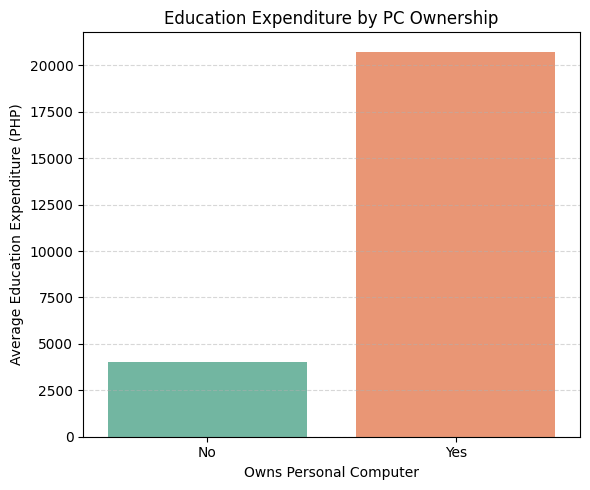

In [21]:
income['Has PC'] = income['Number of Personal Computer'] > 0

pc_education = income.groupby('Has PC')['Education Expenditure'].mean().reset_index()
pc_education.columns = ['Owns Personal Computer', 'Average Education Expenditure']
pc_education

plt.figure(figsize=(6, 5))
sns.barplot(
    x='Owns Personal Computer',
    y='Average Education Expenditure',
    data=pc_education,
    palette='Set2'
)
plt.title("Education Expenditure by PC Ownership")
plt.xlabel("Owns Personal Computer")
plt.ylabel("Average Education Expenditure (PHP)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 19:
<b>Households that own at least one personal computer</b> spend noticeably more on <b>education</b> compared to those who do not. This may reflect a higher prioritization of learning or the financial capacity to invest in both technology and schooling. It also suggests that access to technology could be a signal of overall educational investment and opportunity.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Do Households with Personal Computers Spend More on Communication?
Access to personal computers often comes with greater digital needs, especially for work, education, and connectivity. This question explores whether households that own PCs also spend more on communication-related expenses.

### Q20: Does owning a personal computer lead to higher spending on communication services like internet and mobile use?

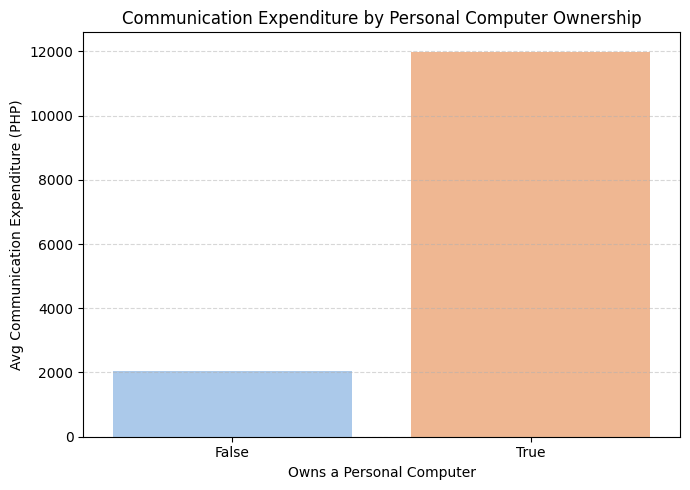

In [22]:
pc_communication = income.groupby("Has PC")["Communication Expenditure"].mean().reset_index()

pc_communication.columns = ["Has Personal Computer", "Avg Communication Expenditure"]
pc_communication

plt.figure(figsize=(7, 5))
sns.barplot(
    x="Has Personal Computer", 
    y="Avg Communication Expenditure", 
    data=pc_communication,
    palette="pastel"
)
plt.title("Communication Expenditure by Personal Computer Ownership")
plt.xlabel("Owns a Personal Computer")
plt.ylabel("Avg Communication Expenditure (PHP)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight 20:
Households that own a <b>personal computer</b> spend significantly more on <b>communication services</b>, likely due to internet subscriptions and increased digital engagement. This shows a clear link between technology ownership and digital-related spending, highlighting how digital inclusion influences household budgets.